<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پر کردن مقادیر گم‌شده
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در اولین گام از پروژه، با نحوه ی خواندن فایل‌هایی با کاراکتر‌های غیرمتداول آشنا می‌شویم، 
ویژگی‌های مختلف هر خانه را می‌بینیم و ویژگی‌هایی که به آن‌ها نیازی نداریم را حذف می‌کنیم. در ادامه تعداد سطرهای دارای مقادیر گم‌شده را به‌دست می‌آوریم و برای رفع آن‌ها چاره‌ای می‌اندیشیم.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در فایل <code>housing_data.csv</code> اطلاعات خانه‌های شهر پکن در اختیار شما گرفته است.
از آنجا که در این مجموعه‌داده کاراکترهای چینی وجود دارد و انکودر (Encoder) پیش‌فرض پانداز قادر به شناسایی آن‌ها نیست نیاز است تا صراحتاً انکودر مناسب این کار را مشخص کنیم. 
 لیست کامل انکودر‌های قابل استفاده در پایتون در <a href=" https://docs.python.org/3/library/codecs.html#standard-encodings"> این لینک </a> آمده است.
با این حال،‌ انکودری که ما به‌دنبال آن هستیم و از کاراکترهای چینی پشتیبانی می‌کند، <code>gbk</code> نام دارد. پس فایل مجموعه‌داده را به کمک این انکودر خوانده و حاصل را در متغیر <code>housing</code> ذخیره می‌کنیم.
</font>
</p>

In [1]:
import pandas as pd
housing = pd.read_csv('housing_data.csv', encoding='gbk')

C:\Users\user\AppData\Local\Temp\ipykernel_696\259660202.py:2: DtypeWarning: Columns (2,10,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  housing = pd.read_csv('housing_data.csv', encoding='gbk')


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون نگاهی به تعداد سطر و ستون مجموعه‌داده بیندازیم:
</font>
</p>

In [2]:
housing.shape

(318851, 22)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همان‌طور که مشاهده می‌کنید اطلاعات بیش از سیصدهزار خانه در این فایل ذخیره شده است. این‌بار با مجموعه‌داده‌ای نسبتاً سنگین سر و کار داریم.
۱۰ ستون اول داده را ببینیم تا با اطلاعات ذخیره‌شده در این مجموعه‌داده بهتر آشنا شویم.</font>
</p>

In [3]:
housing.head(5)

,Unnamed: 0,url,id,Lng,Lat,Cid,tradeTime,DOM,totalPrice,square,...,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,415.0,131.00,...,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,575.0,132.38,...,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,1030.0,198.00,...,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,297.5,134.00,...,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,392.0,81.00,...,1,1,中 6,1960,2,2,0.333,0.0,1.0,1


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در جدول زیر هرکدام از ویژگی‌های خانه‌ها (ستون‌های دیتافریم) شرح داده شده است:
</p>

<center>
<table style="direction: rtl;align: center; text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
  <tr>
      <td><code>Unnamed: 0</code></td><td>نمایه‌ی داده‌هاست که نیازی به آن نداریم و باید حذف شود.</td>
</tr>

  <tr>
      <td><code>url</code></td><td>لینک معامله</td>
</tr>
 

<tr>
      <td><code>id</code></td><td>شناسه‌ی معامله</td>
</tr>
 
<tr>
      <td><code>Lng</code></td><td>طول جغرافیایی خانه‌ی معامله شده</td>
</tr>
 
  
<tr>
      <td><code>Lat</code></td><td>عرض جغرافیایی خانه‌ی معامله شده</td>
</tr>
 
  
<tr>
      <td><code>Cid</code></td><td>شناسه‌ی خریدار</td>
</tr>
 
       
 
<tr>
      <td><code>tradeTime</code></td><td>زمان انجام معامله</td>
</tr>    

 
<tr>
      <td><code>DOM</code></td><td>تعداد روزی که از زمان گذاشتن آگهی خانه می‌گذرد.</td>
</tr>    

<tr>
      <td><code>totalPrice</code></td><td>قیمتی که خانه به فروش رفته است.</td>
</tr>    
  
<tr>
      <td><code>square</code></td><td>متراژ خانه</td>
</tr>       

<tr>
      <td><code>livingRoom</code></td><td>تعداد اتاق نشیمن</td>
</tr>       


    
<tr>
      <td><code>drawingRoom</code></td><td>تعداد اتاق پذیرایی</td>
</tr>       

    
    
<tr>
      <td><code>kitchen</code></td><td>تعداد آشپزخانه</td>
</tr>       

        
<tr>
      <td><code>bathRoom</code></td><td>تعداد حمام</td>
</tr>       


<tr>
      <td><code>floor</code></td><td>طبقه و ارتفاع خانه</td>
</tr>       

    
<tr>
      <td><code>constructionTime</code></td><td>سال ساخت خانه</td>
</tr>       
  
  
    
<tr>
      <td><code>renovationCondition</code></td><td>وضعیت نوسازی خانه</td>
</tr>       
  
    
<tr>
      <td><code>buildingStructure</code></td><td>ساختار خانه</td>
</tr>       
  

<tr>
      <td><code>ladderRatio</code></td><td>طبقه و ارتفاع خانه</td>
</tr>             
  
<tr>
      <td><code>elevator</code></td><td>خانه آسانسور دارد یا خیر</td>
</tr>       
  
  
<tr>
      <td><code>subway</code></td><td>خانه به مترو دسترسی دارد یا خیر</td>
</tr>    
    
  
<tr>
      <td><code>district</code></td><td>منطقه‌ای که خانه در آن قرار دارد</td>
</tr>    
    

</table>

</center>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت اول
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ستون‌های <code>url</code>، <code>id</code>، <code>Cid</code> و ستون اول که نمایه‌ی داده‌ها بود را حذف کنید  و دیتافریم جدید را در متغیر <code>housing_dropped</code> ذخیره کنید.
</font>
</p>


In [4]:
housing_dropped = housing.drop(columns=["Unnamed: 0","Cid","id","url"])
housing_dropped

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,中 6,1960,2,2,0.333,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,116.546899,39.755236,2016-06-10,1.0,350.0,170.07,3,2,1,2,中 5,2003,1,6,0.333,0.0,0.0,3
318847,116.497474,39.810115,2016-06-10,NaN,108.8,35.09,1,0,1,1,中 24,2009,1,6,0.222,1.0,1.0,3
318848,116.497256,39.804081,2016-06-05,1.0,359.0,102.17,2,2,1,2,中 7,2000,3,6,0.500,1.0,0.0,3
318849,116.501794,39.799347,2016-06-12,NaN,720.0,178.34,4,2,1,2,中 5,2003,4,2,0.500,0.0,0.0,3


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت دوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
یک دیتافریم به نام <code>housing_null</code> بسازید که در نمایه‌های آن نام ستون‌ها و در ستونی به نام <code>0</code>،‌ تعداد مقادیر گم‌شده‌ی آن ستون قرار گرفته باشد. پنج ردیف اول این دیتافریم به شکل زیر خواهد بود:
</font>
</p>

<center>
<p style="text-align: right;line-height:200%;font-family:vazir;font-size:medium">

| | <code>0</code> |
| :---: | :---: |
| <code>Lng</code> | 0 |
| <code>Lat</code> | 0 |
| <code>tradeTime</code> | 0 |
| <code>DOM</code> | 157977 |
| <code>totalPrice</code> | 0 |

</p>
<center>

In [5]:
housing_null = pd.DataFrame(housing_dropped.isna().sum())
housing_null

,0
Lng,0
Lat,0
tradeTime,0
DOM,157977
totalPrice,0
square,0
livingRoom,0
drawingRoom,0
kitchen,0
bathRoom,0


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ستون <code>DOM</code> که نشان‌دهنده‌ی تعداد روزهای قرار گرفتن آگهی بر روی سایت است، مقادیر گم‌‌شده‌ی بسیار زیادی دارد و اگر بخواهیم ردیف‌هایی که مقدار <code>DOM</code> آنها موجود نیست را حذف کنیم، تقریباً نیمی از داده‌های ما حذف خواهند شد! از طرفی این ویژگی نتایج مهمی را در مورد خانه‌ها در بر دارد و حذف ستون <code>DOM</code> کار معقولانه‌ای نیست.
پس باید به فکر پر‌کردن مقادیر خالی این ستون باشیم.</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
می‌توان از میانگین یا مد ستون برای پر کردن مقادیر خالی استفاده کرد. بیایید برای تصمیم‌گیری بهتر نگاهی به نمودار جعبه‌ای بیندازیم.
</font>
</p>


<Axes: >

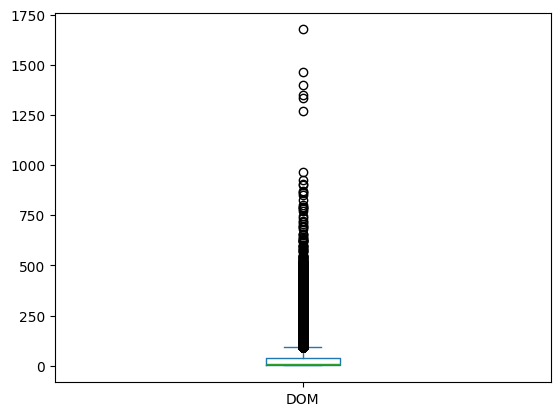

In [6]:
housing_dropped.DOM.plot(kind = 'box')

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
متاسفانه اطلاعات پرت زیادی در این ستون قرار دارد. در این شرایط استفاده از مد گزینه‌ی بهتری خواهد بود. (برای آشنایی با انواع روش‌های کار با داده‌های گم‌شده،
<a href="https://stackabuse.com/python-how-to-handle-missing-dataframe-values-in-pandas/">این لینک</a>
  را ببینید.)
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا به‌کمک متد <code>copy</code> یک کپی از دیتافریم اصلی می‌گیریم تا ادامه‌ی عملیات مدیریت مقادیر گم‌شده را بر روی آن انجام دهیم. نام این دیتافریم جدید را <code>housing_no_missing</code> می‌گذاریم.
</font>
</p>

In [7]:
housing_no_missing = housing_dropped.copy()

<div dir=rtl id="start" style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
	<font face="vazir" size=3>
دیتافریم جدید دقیقاً مانند دیتافریم قبلی است و با تغییر آن، دیتافریم اصلی تغییر نمی‌کند (اگر از تابع <code>copy</code> استفاده نمی‌کردیم، با تغییر دیتافریم جدید، هر دو فایل تغییر می‌کرد).
</div>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت سوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در دیتافریم <code>housing_no_missing</code> مقادیر خالی ستون <code>DOM</code> را با مقدار مد این ستون جایگزین کنید.  پس از آن سطرهایی که مقدار <code>elevator</code> یا <code>subway</code> آن‌ها خالی است را حذف کنید.
</font>
</p>

In [8]:
housing_no_missing["DOM"] = housing_no_missing["DOM"].fillna(housing_dropped['DOM'].mode()[0])
housing_no_missing.dropna(subset=["elevator","subway"],inplace=True)


<div dir=rtl id="start" style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
	<font face="vazir" size=3>
اگر قسمت سوم را درست حل کرده باشید، دیتافریم <code>housing_no_missing</code> باید ۳۱۸۸۱۹ سطر داشته باشد و نباید هیچ‌کدام از ستون‌ها، مقدار گم‌شده داشته باشد.</div>


In [9]:
housing_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318819 entries, 0 to 318850
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318819 non-null  float64
 1   Lat                  318819 non-null  float64
 2   tradeTime            318819 non-null  object 
 3   DOM                  318819 non-null  float64
 4   totalPrice           318819 non-null  float64
 5   square               318819 non-null  float64
 6   livingRoom           318819 non-null  object 
 7   drawingRoom          318819 non-null  object 
 8   kitchen              318819 non-null  int64  
 9   bathRoom             318819 non-null  object 
 10  floor                318819 non-null  object 
 11  constructionTime     318819 non-null  object 
 12  renovationCondition  318819 non-null  int64  
 13  buildingStructure    318819 non-null  int64  
 14  ladderRatio          318819 non-null  float64
 15  elevator             3

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
پس از انجام این عملیات دیگر داده‌ی گم‌شده‌ای نداریم و می‌توانیم به گام بعدی پروژه برویم. در گام بعد از دیتافریم <code>housing_no_missing</code> استفاده خواهیم کرد. دقت کنید که هنگام ذخیره فایل بر روی دیسک هم باید انکودری انتخاب کنیم که قادر به شناسایی همه کاراکتر‌های دیتافریم باشد.
</font>
</p>


In [10]:
housing_no_missing.to_csv('housing_no_missing.csv', encoding='gbk', index=False)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [11]:
import zipfile
import joblib
import numpy as np

np.save("housing_dropped_cols", np.array(housing_dropped.columns.to_list()))
np.save("housing_null", housing_null.to_numpy())
np.save("housing_no_missing_DOM", housing_no_missing['DOM'].to_numpy())

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["housing_dropped_cols.npy", "housing_null.npy", "housing_no_missing_DOM.npy", "1_fill_missing_values.ipynb"]
compress(file_names)

File Paths:
['housing_dropped_cols.npy', 'housing_null.npy', 'housing_no_missing_DOM.npy', '1_fill_missing_values.ipynb']
